In [1]:
import astropy.io.fits as fits
import numpy as np
from scipy.integrate import quad
import scipy.integrate as integrate
from scipy.optimize import curve_fit
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.table import Table, join
import os
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import halomod as hm
import hmf
import treecorr

/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:32: UserWarning: Warning: Some Halo-Exclusion models have significant speedup when using Numba
  from .halo_exclusion import NoExclusion


In [2]:
import DarkVerse as dv


In [3]:

# Define the home directory
home_dir = os.path.expanduser('~')
thesis_path = os.path.join(home_dir, 'Master_Thesis', 'DATA')

# Load Catalog Data
fits_file_path = os.path.join(thesis_path, "Y3_deep_fields_DB_wKNN_cat_COSMOS_zm.fits")  
t = Table.read(fits_file_path)

masked_file_path = os.path.join(thesis_path, "COSMOS_masked_cat.fits")  
t3 = Table.read(masked_file_path)

# Join tables on 'id'
t = join(t, t3, keys='id')
t.rename_column('ra_1', 'ra')
t.rename_column('dec_1', 'dec')

# Load Randoms
fits_random = os.path.join(thesis_path, "COSMOS_randoms_ugriz_trim_video.fits") 
t2 = Table.read(fits_random)
randoms = t2  # Random catalog

# Define Correlation Function Configuration
config = {
    'min_sep': 0.003,
    'max_sep': 1.78,
    'bin_size': 0.1,
    'sep_units': 'degrees',
    'var_method': 'bootstrap'
}

z_min=0.6
z_max=0.7
SM_min=8
SM_max=9

# Select Subsample
subsample = dv.Subsample(catalog=t, randoms=randoms, z_min=z_min, z_max=z_max, SM_min=SM_min, SM_max=SM_max, config=config)

# Get Results
results = subsample.get_results()

print(f"Power Law Parameters (A, gamma): {results['power_law_params']}")
print()
#print(f"w_theta: {results['w_theta']}")
#print(f"DD counts: {results['dd_counts']}")
#print(f"DR counts: {results['dr_counts']}")
#print(f"RR counts: {results['rr_counts']}")


/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(
/home/astro/manasoi7/.conda/envs/project/lib/python3.12/site-packages/halomod/halo_model.py:784: UserWarning: You are using an un-normalized mass function and bias function pair.Bias Tinker10 has the following paired HMF model: (). Matter correlations are not well-defined.
  tools.norm_warn(self)


Power Law Parameters (A, gamma): [0.00319377 0.57196029]



Errors on w_theta: [2.67775300e-01 2.66688112e-01 2.51363579e-01 2.61000584e-01
 2.54715037e-01 2.67379570e-01 2.51002411e-01 2.46849052e-01
 2.45566995e-01 2.51517686e-01 2.55838105e-01 2.49883747e-01
 2.52334838e-01 2.58393916e-01 2.44888968e-01 2.46789343e-01
 2.45008194e-01 2.48668936e-01 2.44192792e-01 2.45157328e-01
 2.43042549e-01 2.41320652e-01 2.40749990e-01 2.38282073e-01
 2.33204299e-01 2.33715800e-01 2.27541949e-01 2.20910575e-01
 2.18283788e-01 2.07251126e-01 1.99581143e-01 1.90882753e-01
 1.85256263e-01 1.74476570e-01 1.64088147e-01 1.56495503e-01
 1.47632098e-01 1.43153059e-01 1.39368840e-01 1.35471678e-01
 1.33769686e-01 1.26980442e-01 1.18034756e-01 1.05440715e-01
 9.39898655e-02 8.66318494e-02 8.43066181e-02 8.16796189e-02
 8.11421398e-02 7.77768230e-02 7.70243366e-02 7.69311292e-02
 7.91360412e-02 7.82470000e-02 7.84736587e-02 8.10626040e-02
 7.91892262e-02 8.46855796e-02 9.31419406e-02 1.16299309e-01
 1.27711603e-01 2.04743777e-01 1.18546641e+00 5.42310780e+02]


/tmp/ipykernel_3873019/2901281716.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


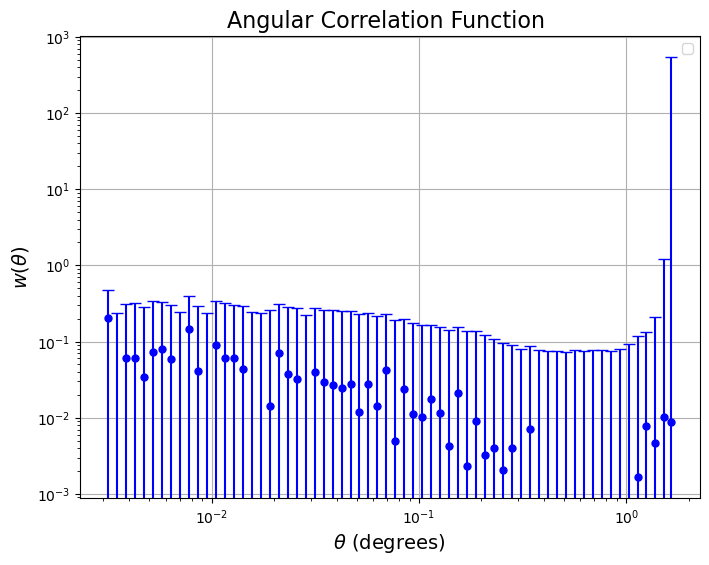

In [4]:

theta_values = results['theta']
w_theta_values = results['w_theta']
var_w_theta_values = results['var_w_theta']

# Compute errors (standard deviation)
w_theta_errors = np.sqrt(var_w_theta_values)

print("Errors on w_theta:", w_theta_errors)


plt.figure(figsize=(8, 6))
plt.errorbar(theta_values, w_theta_values, yerr= w_theta_errors, fmt='o', color='blue', capsize=4, markersize=5)

plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function ', fontsize=16)

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.grid(True)
plt.show()


### ^these errors are way too big wtf is going on??

In [5]:
gg = subsample.compute_gg()  



In [6]:
print(f"xi g: {results['xi_g']}")


xi g: [6.71298995e+00 6.09663707e+00 5.51750326e+00 4.97581600e+00
 4.47149153e+00 4.00417099e+00 3.57317381e+00 3.17755720e+00
 2.81610809e+00 2.48742307e+00 2.19004713e+00 1.92201419e+00
 1.68025740e+00 1.46300686e+00 1.26951789e+00 1.09800892e+00
 9.45640503e-01 8.10085196e-01 6.88461994e-01 5.77817439e-01
 4.70904870e-01 3.80664927e-01 3.14791150e-01 2.67393354e-01
 2.33524543e-01 2.09337688e-01 1.91890985e-01 1.78982317e-01
 1.69006895e-01 1.60835045e-01 1.53705507e-01 1.47131638e-01
 1.40822172e-01 1.34616317e-01 1.28433964e-01 1.22242176e-01
 1.16033701e-01 1.09815295e-01 1.03601030e-01 9.74089621e-02
 9.12597804e-02 8.51765739e-02 7.91836049e-02 7.33042760e-02
 6.75609053e-02 6.19760684e-02 5.65713529e-02 5.13665376e-02
 4.63808909e-02 4.16317039e-02 3.71349222e-02 3.29036175e-02
 2.89478654e-02 2.52743590e-02 2.18870108e-02 1.87875973e-02
 1.59751559e-02 1.34449262e-02 1.11892372e-02 9.19917081e-03
 7.46349838e-03 5.96840826e-03 4.69924069e-03 3.63734472e-03]


In [7]:


# Compute correlation functions
theta, xi_g, xi_m = subsample.compute_gg()

# Retrieve all results
results = subsample.get_results()

# Print key outputs
print("Galaxy-Galaxy Angular Correlation:", results['xi_g'])
print("Matter-Matter Angular Correlation:", results['xi_m'])


Galaxy-Galaxy Angular Correlation: [6.71298995e+00 6.09663707e+00 5.51750326e+00 4.97581600e+00
 4.47149153e+00 4.00417099e+00 3.57317381e+00 3.17755720e+00
 2.81610809e+00 2.48742307e+00 2.19004713e+00 1.92201419e+00
 1.68025740e+00 1.46300686e+00 1.26951789e+00 1.09800892e+00
 9.45640503e-01 8.10085196e-01 6.88461994e-01 5.77817439e-01
 4.70904870e-01 3.80664927e-01 3.14791150e-01 2.67393354e-01
 2.33524543e-01 2.09337688e-01 1.91890985e-01 1.78982317e-01
 1.69006895e-01 1.60835045e-01 1.53705507e-01 1.47131638e-01
 1.40822172e-01 1.34616317e-01 1.28433964e-01 1.22242176e-01
 1.16033701e-01 1.09815295e-01 1.03601030e-01 9.74089621e-02
 9.12597804e-02 8.51765739e-02 7.91836049e-02 7.33042760e-02
 6.75609053e-02 6.19760684e-02 5.65713529e-02 5.13665376e-02
 4.63808909e-02 4.16317039e-02 3.71349222e-02 3.29036175e-02
 2.89478654e-02 2.52743590e-02 2.18870108e-02 1.87875973e-02
 1.59751559e-02 1.34449262e-02 1.11892372e-02 9.19917081e-03
 7.46349838e-03 5.96840826e-03 4.69924069e-03 3.63

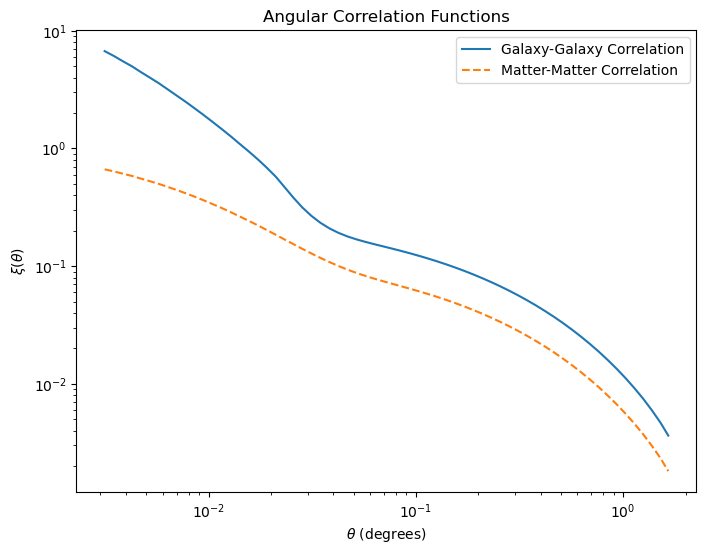

In [8]:
plt.figure(figsize=(8,6))
plt.loglog(results['theta'], results['xi_g'], label='Galaxy-Galaxy Correlation')
plt.loglog(results['theta'], results['xi_m'], label='Matter-Matter Correlation', linestyle='dashed')

plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\xi(\theta)$')
plt.legend()
plt.title('Angular Correlation Functions')
plt.show()


Errors on w_theta: [2.67775300e-01 2.66688112e-01 2.51363579e-01 2.61000584e-01
 2.54715037e-01 2.67379570e-01 2.51002411e-01 2.46849052e-01
 2.45566995e-01 2.51517686e-01 2.55838105e-01 2.49883747e-01
 2.52334838e-01 2.58393916e-01 2.44888968e-01 2.46789343e-01
 2.45008194e-01 2.48668936e-01 2.44192792e-01 2.45157328e-01
 2.43042549e-01 2.41320652e-01 2.40749990e-01 2.38282073e-01
 2.33204299e-01 2.33715800e-01 2.27541949e-01 2.20910575e-01
 2.18283788e-01 2.07251126e-01 1.99581143e-01 1.90882753e-01
 1.85256263e-01 1.74476570e-01 1.64088147e-01 1.56495503e-01
 1.47632098e-01 1.43153059e-01 1.39368840e-01 1.35471678e-01
 1.33769686e-01 1.26980442e-01 1.18034756e-01 1.05440715e-01
 9.39898655e-02 8.66318494e-02 8.43066181e-02 8.16796189e-02
 8.11421398e-02 7.77768230e-02 7.70243366e-02 7.69311292e-02
 7.91360412e-02 7.82470000e-02 7.84736587e-02 8.10626040e-02
 7.91892262e-02 8.46855796e-02 9.31419406e-02 1.16299309e-01
 1.27711603e-01 2.04743777e-01 1.18546641e+00 5.42310780e+02]


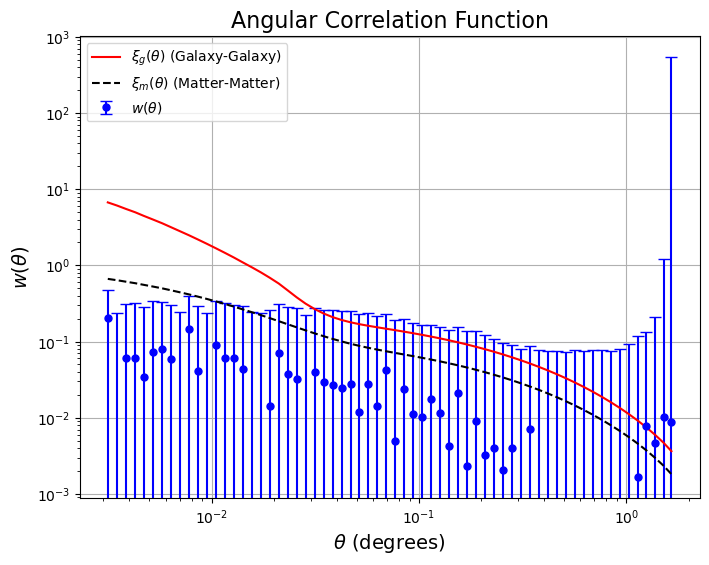

In [9]:

theta_values = results['theta']
w_theta_values = results['w_theta']
var_w_theta_values = results['var_w_theta']
xi_g_values = results['xi_g']
xi_m_values = results['xi_m']

# Compute errors (standard deviation)
w_theta_errors = np.sqrt(var_w_theta_values)

print("Errors on w_theta:", w_theta_errors)

# Create figure
plt.figure(figsize=(8, 6))

# Plot w(theta) with error bars
plt.errorbar(theta_values, w_theta_values, yerr=w_theta_errors, fmt='o', 
             color='blue', capsize=4, markersize=5, label=r'$w(\theta)$')

# Plot galaxy and matter correlation functions
plt.plot(theta_values, xi_g_values, label=r'$\xi_{g}(\theta)$ (Galaxy-Galaxy)', linestyle='-', color='red')
plt.plot(theta_values, xi_m_values, label=r'$\xi_{m}(\theta)$ (Matter-Matter)', linestyle='dashed', color='black')

# Log-log scales
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$ w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function', fontsize=16)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [12]:


bias_estimator = dv.BiasEstimator(
    xi_g=results['xi_g'],
    xi_m=results['xi_m'],
    w_theta_list=[results['w_theta']], 
    w_theta_error_list=[results['var_w_theta']], 
    sum_rr_list=[results['rr_counts']], 
    mask = (theta_values >= 0.1) & (theta_values <= 0.4)
)

bias_values, bias_errors = bias_estimator.estimate_bias()
print("Bias values:", bias_values)
print("Bias errors:", bias_errors)


Bias values: [1.0450249283238866]
Bias errors: [0.040268753436108064]


In [13]:
xi_m_values = np.array(results['xi_m'])  # Matter-matter correlation function
IC_values = np.array(bias_estimator.IC_list)  # Integral Constraint correction

# Compute the model: xi_m * b^2 - IC
model_values = xi_m_values * bias_values[0]**2 - IC_values[0]  # single subsample

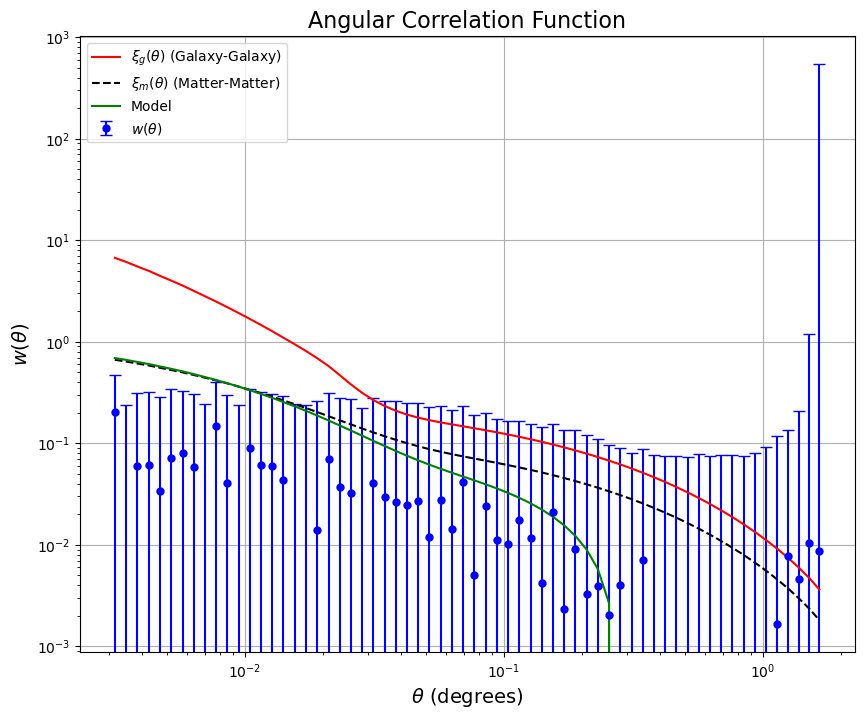

In [15]:
plt.figure(figsize=(10, 8))
plt.errorbar(theta_values, w_theta_values, yerr=w_theta_errors, fmt='o', 
             color='blue', capsize=4, markersize=5, label=r'$w(\theta)$')

# Plot galaxy and matter correlation functions
plt.plot(theta_values, xi_g_values, label=r'$\xi_{g}(\theta)$ (Galaxy-Galaxy)', linestyle='-', color='red')
plt.plot(theta_values, xi_m_values, label=r'$\xi_{m}(\theta)$ (Matter-Matter)', linestyle='dashed', color='black')

plt.plot(theta_values, model_values, label=r'Model', color='g')
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$ w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function', fontsize=16)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()

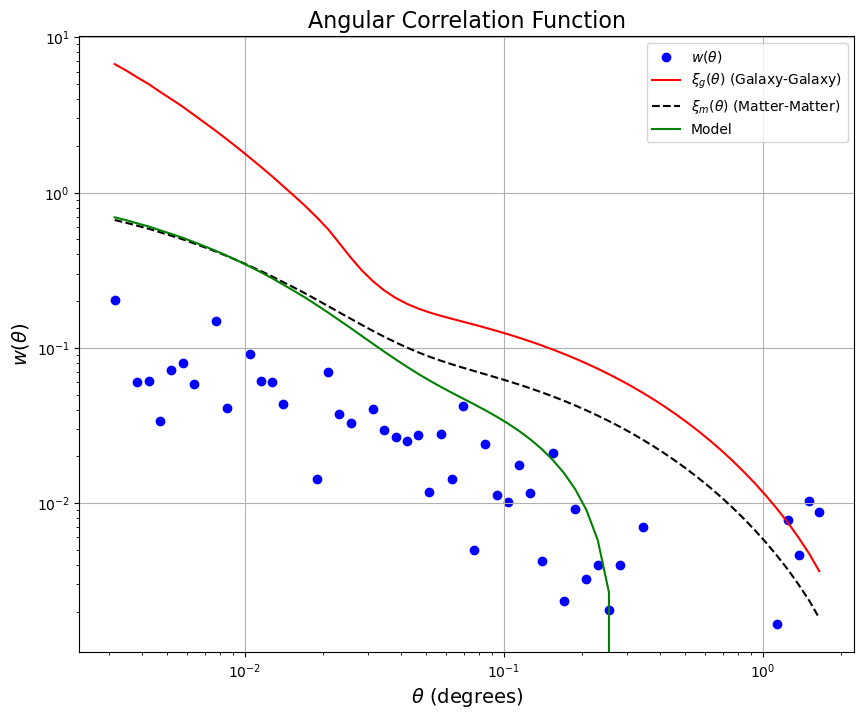

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(theta_values, w_theta_values,  
             color='blue',  label=r'$w(\theta)$')

# Plot galaxy and matter correlation functions
plt.plot(theta_values, xi_g_values, label=r'$\xi_{g}(\theta)$ (Galaxy-Galaxy)', linestyle='-', color='red')
plt.plot(theta_values, xi_m_values, label=r'$\xi_{m}(\theta)$ (Matter-Matter)', linestyle='dashed', color='black')

plt.plot(theta_values, model_values, label=r'Model', color='g')
plt.xscale('log')
plt.yscale('log')

# Labels and title
plt.xlabel(r'$\theta$ (degrees)', fontsize=14)
plt.ylabel(r'$ w(\theta)$', fontsize=14)
plt.title('Angular Correlation Function', fontsize=16)

# Add legend and grid
plt.legend()
plt.grid(True)

# Show plot
plt.show()